In [6]:
from utils import *
from opt import *
import time


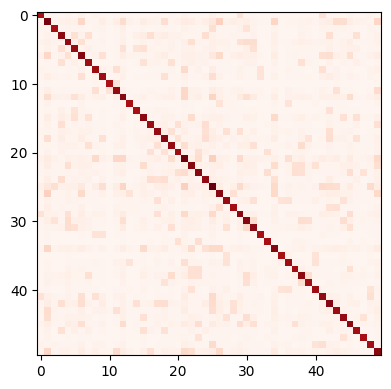

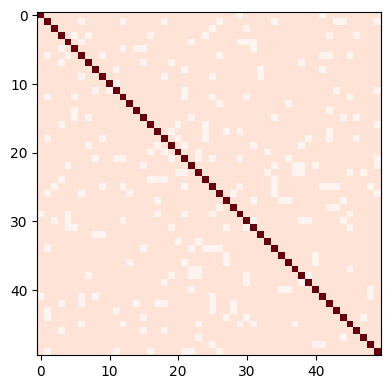

In [4]:
# Generating MTP2 Gaussian distributions and their data

p = 50
edge_prob = .1
A = generate_erdos_renyi(p,edge_prob)
n = 500

Sigma, Theta = create_mtp2_cov(A)
X = np.random.multivariate_normal(np.zeros(p), Sigma, n)
Sigma_hat = X.T@X/n

madimshow(Sigma, 'Reds')
madimshow(Theta, 'Reds')

In [5]:
# Generate node groups and compute DP gap

g = 2
z = np.ones(p, dtype=int)
z[:int(p/2)] = 0
Z = np.eye(g)[z].T

mask_Z = [[(Z[a][:,None]*Z[b][None])*(1-np.eye(p)) for b in range(g)] for a in range(g)]
ccalZ = [[np.where(mask_Z[a][b]==1) for b in range(g)] for a in range(g)]

compute_dp2(Theta,Z)

2.208857984754511e-05

Time for CVXPY: 4.509 s
Time for FISTA: 0.865 s


0.0006885586512756044

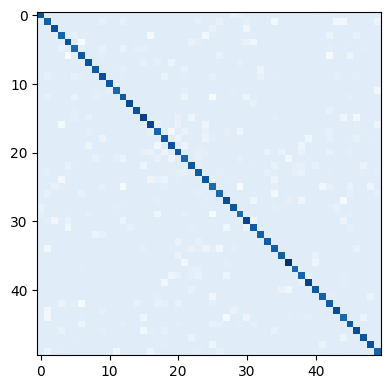

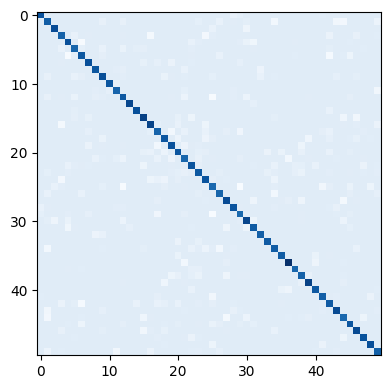

In [9]:
# Testing out algorithms

mu1 = .01
mu2 = 1
epsilon = 1e-3
bias_type = 'dp'
eta = .02
iters = 1000

tic = time.perf_counter()
Theta_cvxpy = FairGLASSO_cvx(Sigma_hat, Z, mu1, mu2, epsilon, bias_type)
toc = time.perf_counter()
print(f'Time for CVXPY: {toc-tic:.3f} s')

tic = time.perf_counter()
Theta_fista = node_FGL_fista(Sigma_hat,mu1,eta,mu2,Z,bias_type,epsilon,iters)
toc = time.perf_counter()
print(f'Time for FISTA: {toc-tic:.3f} s')

madimshow(Theta_cvxpy, 'Blues')
madimshow(Theta_fista, 'Blues')

compute_frob_err(Theta_cvxpy, Theta_fista)
compute_frob_err(Theta_cvxpy*(1-np.eye(p)), Theta_fista*(1-np.eye(p)))
